# KNMI Drougt Indices

In [1]:
import hydropandas as hpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from spei import knmi

/home/martin/repos/SPEI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
today = pd.Timestamp.today()
stn = 260
startdate = pd.Timestamp("1960-01-01")
enddate = today
# Load the data
prec = hpd.PrecipitationObs.from_knmi(
    meteo_var="RH", stn=stn, startdate=startdate, enddate=enddate
)["RH"].multiply(1e3)
prec.index = prec.index.normalize()
evap = hpd.EvaporationObs.from_knmi(
    meteo_var="EV24", stn=stn, startdate=startdate, enddate=enddate
)["EV24"].multiply(1e3)
evap.index = evap.index.normalize()
temp = hpd.MeteoObs.from_knmi(
    meteo_var="TG", stn=stn, startdate=startdate, enddate=enddate
)["TG"]
temp.index = temp.index.normalize()
deficit = evap - prec

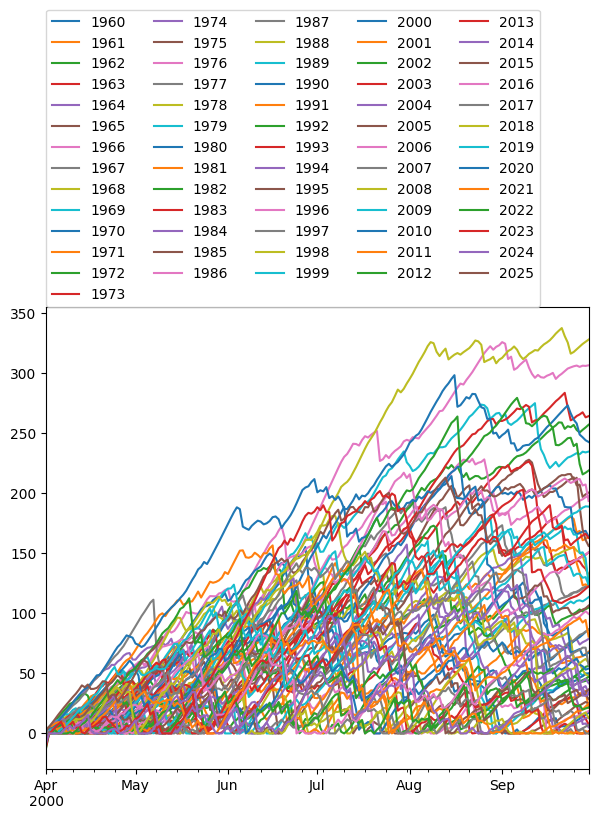

In [3]:
startdate = pd.Timestamp("2000-04-01")
enddate = pd.Timestamp("2000-09-30")
cumdf = knmi.get_cumulative_deficit(
    deficit=deficit, startdate=startdate, enddate=enddate, allow_below_zero=False
)
ax = cumdf.plot(figsize=(7.0, 6.0))
ax.legend(ncol=5, loc=(0, 1))

In [4]:
doct1 = knmi.deficit_oct1(deficit)
doct1.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Doct1,17.2,21.2,104.7,7.6,78.7,24.9,18.6,124.1,0.0,49.3,...,99.5,56.6,327.8,124.3,242.6,80.6,218.8,162.8,32.8,NaN


In [5]:
dmax = knmi.deficit_max(deficit)
dmax.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Dmax,104.8,75.8,116.9,92.1,113.4,49.1,105.9,194.6,43.3,148.2,...,101.7,143.4,337.4,172.1,298.2,119.8,279.3,201.8,123.8,80.1


In [6]:
diapr1 = knmi.deficit_apr1(deficit)
diapr1.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIapr1,110.7,75.8,116.9,169.4,113.4,269.6,226.5,194.6,172.6,154.3,...,119.6,142.8,337.4,172.1,295.7,119.8,279.3,201.8,123.8,77.5


In [7]:
digdd = knmi.deficit_gdd(deficit, temp, threshold=440.0)
digdd.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIgdd,91.1,33.3,113.0,80.8,93.5,4.4,90.3,126.1,12.9,113.6,...,61.2,145.6,311.9,178.2,293.0,85.9,254.3,135.5,1.0,80.1


In [8]:
diwet = knmi.deficit_wet(deficit)
diwet.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIwet,2.4,-1.0,-14.8,29.1,58.5,-15.1,-5.2,50.6,-12.4,0.7,...,-1.1,9.8,172.7,0.3,87.9,-2.6,109.1,-21.1,-2.6,38.2


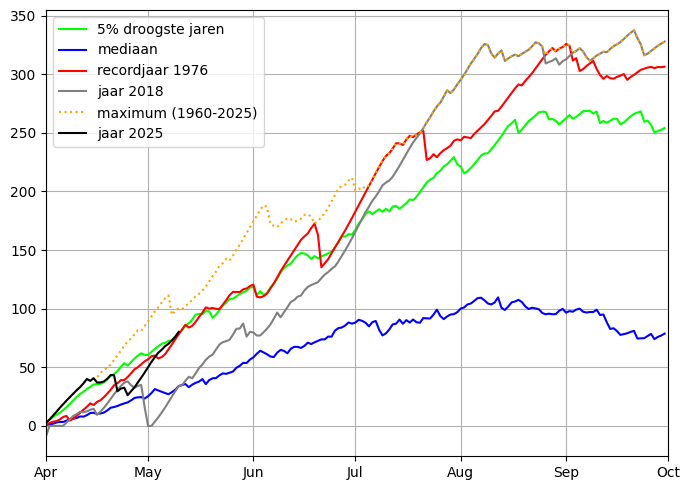

In [9]:
# do something about no negative values in original KNMI stuff
f, ax = plt.subplots(figsize=(7, 5), layout="tight")
ax.plot(cumdf.quantile(0.95, axis=1), label="5% droogste jaren", color="lime")
# ax.plot(cumdf.mean(axis=1), label="gemiddeld", color="blue")
ax.plot(cumdf.median(axis=1), label="mediaan", color="blue")
ax.plot(cumdf.loc[:, 1976], label="recordjaar 1976", color="red")
ax.plot(cumdf.loc[:, 2018], label="jaar 2018", color="grey")
ax.plot(
    cumdf.max(axis=1),
    label=f"maximum ({cumdf.columns[0]}-{cumdf.columns[-1]})",
    color="orange",
    linestyle=":",
)
ax.plot(cumdf.loc[:, today.year], label=f"jaar {today.year}", color="k")
ax.grid(True)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%b"))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.set_xlim(pd.Timestamp("2000-04-01"), pd.Timestamp("2000-10-01"))
ax.legend()